In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sn

In [2]:
data=pd.read_csv("F:/ExcelR workings/Assignments/Clustering/crime_data.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
# Normalized data frame (considering the numerical part of data)
Data_norm= norm_func(data.iloc[:,1:])

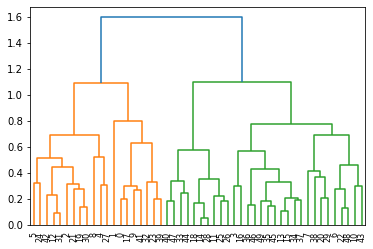

In [9]:
# create dendogram
dendrogram=sch.dendrogram(sch.linkage(Data_norm, method = 'complete'))

In [13]:
# Create Clusters
hc=AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [16]:
# Save clusters for chart
y_hc=hc.fit_predict(Data_norm)
Clusters=pd.DataFrame(y_hc, columns = ['Clusters'])

In [17]:
Data_norm['h_clusterid'] = hc.labels_

In [18]:
Data_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,3
5,0.427711,0.544521,0.779661,0.811370,3
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,3
9,1.000000,0.568493,0.474576,0.478036,0


In [21]:
data['h_clusterid']=hc.labels_

In [22]:
data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


# Inferences is that Clusterid 0 is at number in higher rate of crime like Murder, Assault and second in Rape cases, Clusterid 3 is at 1st in Rape cases.